In [1]:
# A Binary Tree Node
from collections import deque

class TreeStringParser:
  def __init__(self, input: str):
    self.parsed = list()
    for idx, ch in enumerate(input):
      if idx % 2:
        self.parsed[-1].append(int(ch))
      else:
        self.parsed.append([int(ch)])

class Node:
    def __init__(self, data=None, left=None, right=None):
        self.data = data
        self.left = left
        self.right = right

class BinaryTree:

  def __init__(self, input_stream, stack = True):
    self.input_stream = input_stream
    self.current_node_index = 0
    if not stack:
      self.root = self.build_tree()
    else:
      self.root = self.build_tree_stack()

  def build_tree(self):
    """
    do not use
    """
    self.current_node_index += 1
    node = Node(self.current_node_index)
    encoded_node = self.input_stream[self.current_node_index - 1]
    has_left, has_right = encoded_node
    
    if has_left:
      node.left = self.build_tree()
    if has_right:
      node.right = self.build_tree()
    return node

  def build_tree_stack(self):
    stack = deque()
    root = Node(None)
    stack.append(root)

    while (len(stack)):
      # actual node processing here, when it come out of stack
      top = stack.pop()
      self.current_node_index += 1
      top.data = self.current_node_index
      encoded_node = self.input_stream[self.current_node_index - 1]

      # getting if left / right node exists
      has_left, has_right = encoded_node
      if has_right:
        top.right = Node(None)
        stack.append(top.right)
      if has_left:
        top.left = Node(None)
        stack.append(top.left)
    return root

  def print(self):
    self.print_node(self.root)

  def print_node(self, node, cur="", left=True):
    if not node:
      return
    cur_ = cur[:-1] + " "
    cur_sub = " " if not cur else cur
    self.print_node(node.right, (cur_sub if left else cur_) + "     |", False)
    print(f"""{cur[:-1] + "#"}----({node.data})""")
    self.print_node(node.left, (cur_sub if not left else cur_) + "     |", True)

  def get_traversal_with_stack(self, debug=False):
    stack = deque()
    stack.append(self.root)
    while len(stack):
      top = stack.pop()
      if debug:
        print(f"node={top.data}: [{top.left.data if top.left else '-'}, {top.right.data if top.right else '-'}]")
      yield top.data
      if top.right:
        stack.append(top.right)
      if top.left:
        stack.append(top.left)

  def get_preorder_efficient(self):
    cur = self.root
    while cur:
      if not cur.left:
        yield cur.data
        cur = cur.right
      else:
        prev = cur.left
        while prev.right not in (cur, None):
          prev = prev.right
        if prev.right is None:
          yield cur.data
          prev.right = cur
          cur = cur.left
        elif prev.right == cur:
          prev.right = None
          cur = cur.right

if __name__ == '__main__':
  string_input = "111011010011000001110010100100"
  string_input = "1111000000"
  input_stream = TreeStringParser(string_input).parsed
  print(input_stream)

  tree = BinaryTree(input_stream)
  tree.print()
  print("\nStep-1: Pre-order traversal with stack:")
  print("\npreorder: ", list(tree.get_traversal_with_stack(debug=True)))
  
  print("\n\nStep-2: Pre-order traversal without extra space:")
  print(list(tree.get_preorder_efficient()))

  print("\n\nStep-3: Pre-order traversal with stack to verify:")
  print("preorder: ", list(tree.get_traversal_with_stack()))

  print("\n\n")
  tree.print()

[[1, 1], [1, 1], [0, 0], [0, 0], [0, 0]]
      #----(5)
#----(1)
      |     #----(4)
      #----(2)
            #----(3)

Step-1: Pre-order traversal with stack:
node=1: [2, 5]
node=2: [3, 4]
node=3: [-, -]
node=4: [-, -]
node=5: [-, -]

preorder:  [1, 2, 3, 4, 5]


Step-2: Pre-order traversal without extra space:
[1, 2, 3, 4, 5]


Step-3: Pre-order traversal with stack to verify:
preorder:  [1, 2, 3, 4, 5]



      #----(5)
#----(1)
      |     #----(4)
      #----(2)
            #----(3)


In [2]:
# string_input

1000
2000
5000
10000
20000
50000
100000
200000
500000


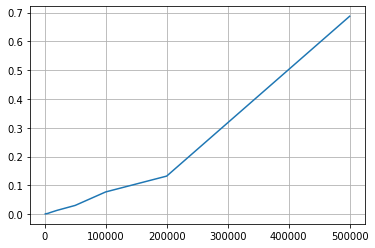

In [3]:
import matplotlib.pyplot as plt
import time
import sys
sys.setrecursionlimit(100000)

def generate_test(n):
  ones = n-1
  zeros = 2 * n - ones
  string_input = ones * "1" + zeros * "0"
  input_stream = TreeStringParser(string_input).parsed
  return input_stream

def execute_test_efficient(n):
  tree = BinaryTree(generate_test(n))
  st = time.time()
  print(len(list(tree.get_preorder_efficient())))
  return time.time() - st

exec_times = []
nodes = []
for i in (1,2,5,10,20,50,100, 200, 500):
  n = i * 1000
  exec_time = execute_test_efficient(n)
  exec_times.append(exec_time)
  nodes.append(n)

plt.plot(nodes, exec_times)
plt.grid()